In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv(r"C:\Users\asnav\OneDrive\Documents\MachineLearningProjects\Kodbud\covid_19\dataset.csv")

In [50]:
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [51]:
df.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


In [52]:
df.shape

(188, 12)

In [53]:
df.dtypes

Date                       object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
No. of countries            int64
dtype: object

In [54]:
df.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [55]:
df.isna().sum()

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

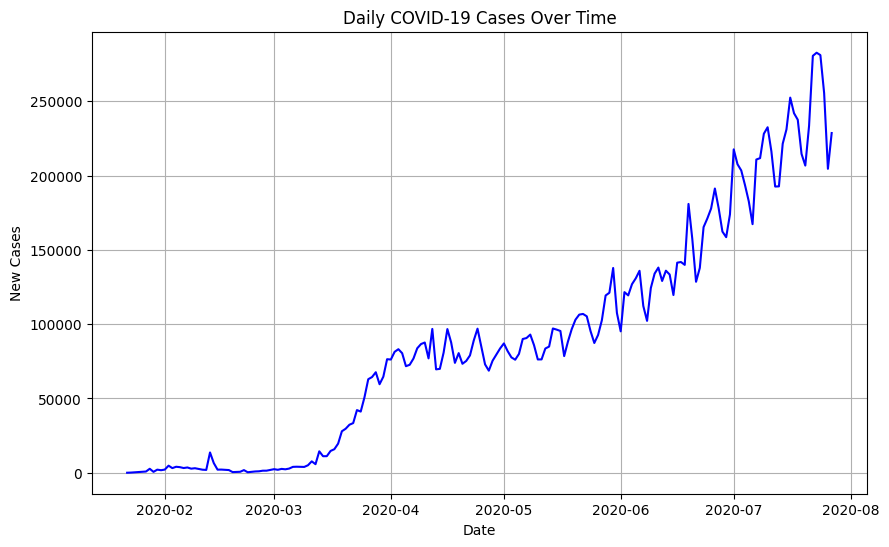

In [58]:
# New cases
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['New cases'], color='b')
plt.title('Daily COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

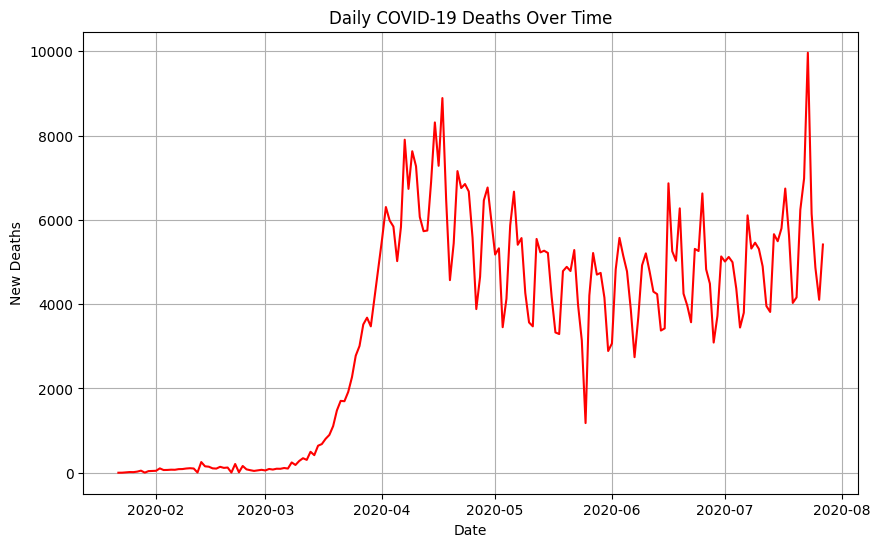

In [59]:
# Daily Deaths
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['New deaths'], color='r')
plt.title('Daily COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()

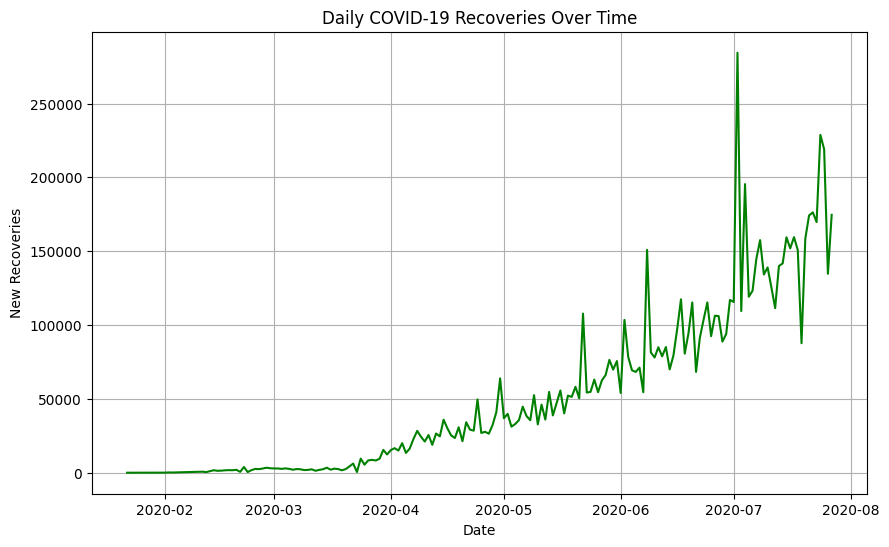

In [60]:
# Daily Recoveries
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['New recovered'], color='g')
plt.title('Daily COVID-19 Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('New Recoveries')
plt.grid(True)
plt.show()

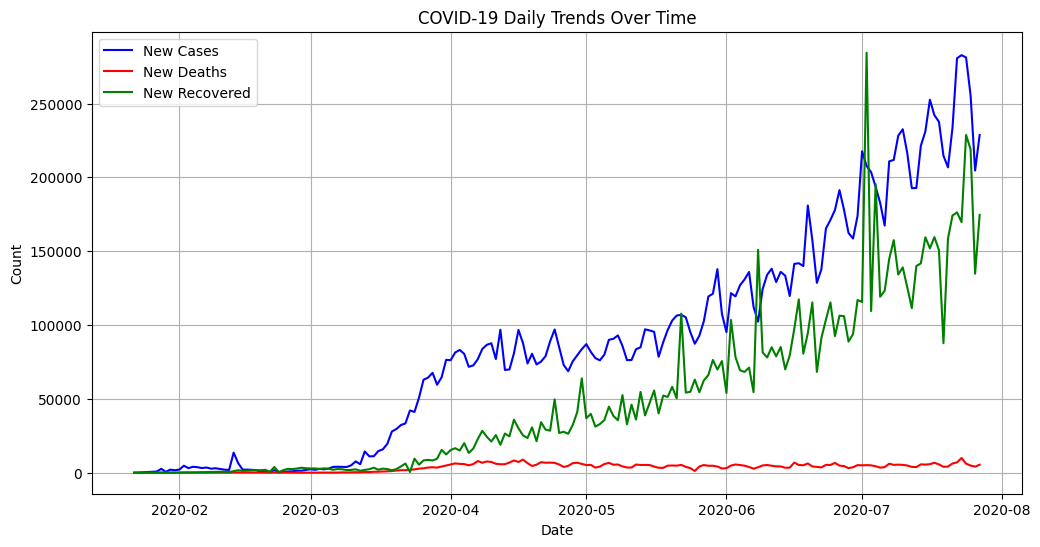

In [61]:
# plot all three trends together for comparison
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['New cases'], label='New Cases', color='b')
plt.plot(df['Date'], df['New deaths'], label='New Deaths', color='r')
plt.plot(df['Date'], df['New recovered'], label='New Recovered', color='g')
plt.title('COVID-19 Daily Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

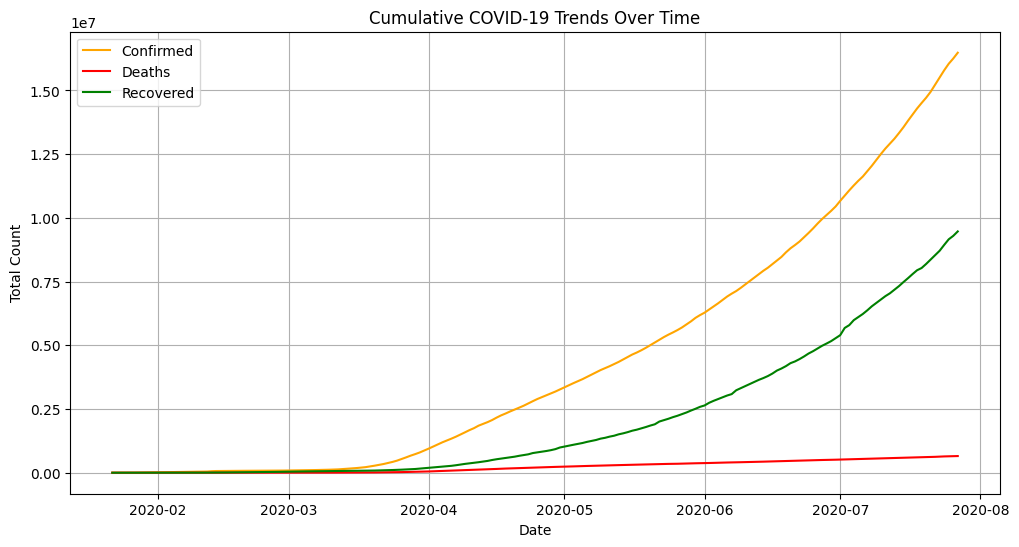

In [62]:
# plot total confirmed, deaths, and recovered to see overall growth
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed', color='orange')
plt.plot(df['Date'], df['Deaths'], label='Deaths', color='red')
plt.plot(df['Date'], df['Recovered'], label='Recovered', color='green')
plt.title('Cumulative COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True)
plt.show()

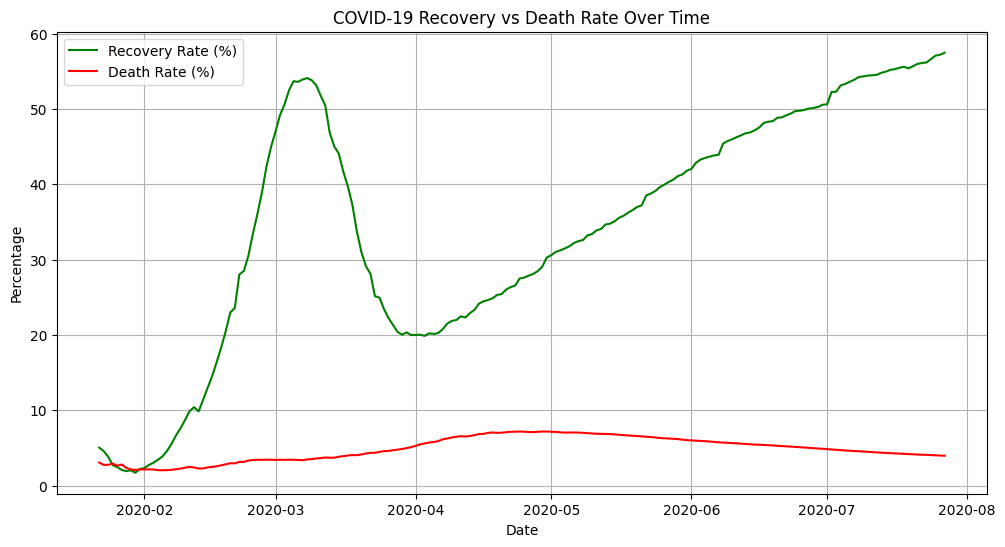

In [63]:
# Recovery vs Death Rate Over Time
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100
df['Death Rate'] = (df['Deaths'] / df['Confirmed']) * 100

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Recovery Rate'], label='Recovery Rate (%)', color='green')
plt.plot(df['Date'], df['Death Rate'], label='Death Rate (%)', color='red')
plt.title('COVID-19 Recovery vs Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
print("Peak daily new cases:", df['New cases'].max(), "on", df.loc[df['New cases'].idxmax(), 'Date'])

Peak daily new cases: 282756 on 2020-07-23 00:00:00


In [65]:
print("Peak daily deaths:", df['New deaths'].max(), "on", df.loc[df['New deaths'].idxmax(), 'Date'])

Peak daily deaths: 9966 on 2020-07-23 00:00:00


In [66]:
print("Peak daily recoveries:", df['New recovered'].max(), "on", df.loc[df['New recovered'].idxmax(), 'Date'])

Peak daily recoveries: 284394 on 2020-07-02 00:00:00


In [67]:
print("Total confirmed cases:", df['Confirmed'].iloc[-1])

Total confirmed cases: 16480485


In [68]:
print("Total deaths:", df['Deaths'].iloc[-1])

Total deaths: 654036


In [69]:
print("Total recovered:", df['Recovered'].iloc[-1])

Total recovered: 9468087


In [70]:
print("Average daily new cases:", df['New cases'].mean())

Average daily new cases: 87771.02127659574


In [71]:
print("Average daily deaths:", df['New deaths'].mean())

Average daily deaths: 3478.824468085106
